In [27]:
import numpy as np
import matplotlib.pyplot as plt

import os

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import utilities

In [28]:
import urllib

json_local = os.path.join('data', 'sarcasm', 'sarcasm.json')
json_url = 'https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json'

if not os.path.exists(json_local):
    urllib.request.urlretrieve(json_url, json_local)

In [29]:
import json

with open(json_local) as file:
    data = json.load(file)
    
hls, lbs = [], []

for e in data:
    hls.append(e['headline'])
    lbs.append(e['is_sarcastic'])
    
lbs = np.array(lbs)

In [4]:
num_words = 10000
embed_d = 16
maxlen = 32
trn_size = 20000

In [72]:
def fit_sarcasm(num_words, embed_d, maxlen, dense_neuron=0, trn_size=20000, epochs=10):
    tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
    tokenizer.fit_on_texts(hls[:trn_size])

    sqs = tokenizer.texts_to_sequences(hls)
    sqs = pad_sequences(sqs, padding='post', maxlen=maxlen, truncating='post')
    
    trn_sqs, val_sqs = sqs[:trn_size], sqs[trn_size:]
    trn_lbs, val_lbs = lbs[:trn_size], lbs[trn_size:]
    
    if dense_neuron == 0:
        model = keras.models.Sequential([
            keras.layers.Embedding(num_words, embed_d, input_length=maxlen),
            keras.layers.GlobalAveragePooling1D(),
            keras.layers.Dense(1, activation='sigmoid'),
        ])
    else:
        model = keras.models.Sequential([
            keras.layers.Embedding(num_words, embed_d, input_length=maxlen),
            keras.layers.GlobalAveragePooling1D(),
            keras.layers.Dense(dense_neuron, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid'),
        ])
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(trn_sqs, trn_lbs, epochs=epochs, validation_data=(val_sqs, val_lbs))
    utilities.plot_train_val_metrics(history, metrics=['loss', 'accuracy'])
    
    return model, tokenizer

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 32, 32)            320000    
                                                                 
 global_average_pooling1d_6   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_9 (Dense)             (None, 24)                792       
                                                                 
 dense_10 (Dense)            (None, 1)                 25        
                                                                 
Total params: 320,817
Trainable params: 320,817
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 4s 5ms/step - loss: 0.5255 - accuracy: 0.7294 - val_loss: 0.

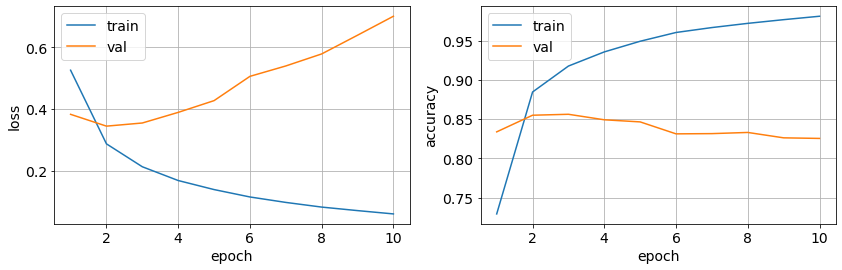

In [33]:
%%time
model, tokenizer = fit_sarcasm(num_words=10000, embed_d=32, maxlen=32, dense_neuron=24)

In [34]:
utilities.save_tsv(model, tokenizer, os.path.join('data', 'sarcasm', 'sarcasm'))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 32, 32)            320000    
                                                                 
 global_average_pooling1d_7   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 4s 5ms/step - loss: 0.6319 - accuracy: 0.6413 - val_loss: 0.5422 - val_accuracy: 0.7909
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4487 - accuracy: 0.8383 - va

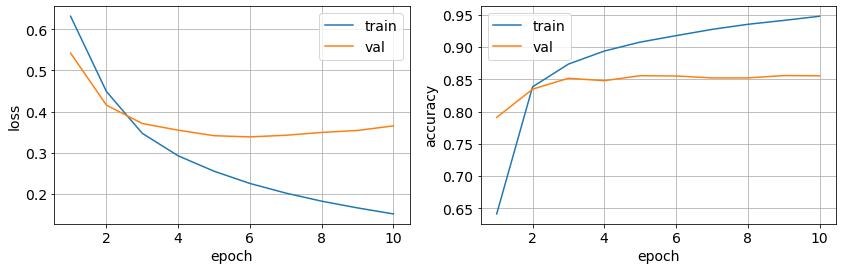

In [35]:
%%time
model, tokenizer = fit_sarcasm(num_words=10000, embed_d=32, maxlen=32, dense_neuron=0)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 16, 32)            32000     
                                                                 
 global_average_pooling1d_8   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 32,033
Trainable params: 32,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.5943 - accuracy: 0.6954 - val_loss: 0.4888 - val_accuracy: 0.7916
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4320 - accuracy: 0.8134 - val_

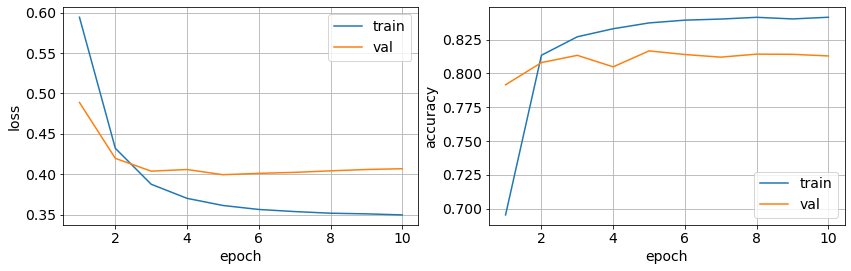

In [37]:
%%time
model, tokenizer = fit_sarcasm(num_words=1000, embed_d=32, maxlen=16)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 8, 32)             3200      
                                                                 
 global_average_pooling1d_9   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,233
Trainable params: 3,233
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.5951 - accuracy: 0.6752 - val_loss: 0.5193 - val_accuracy: 0.7395
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5054 - accuracy: 0.7421 - val_lo

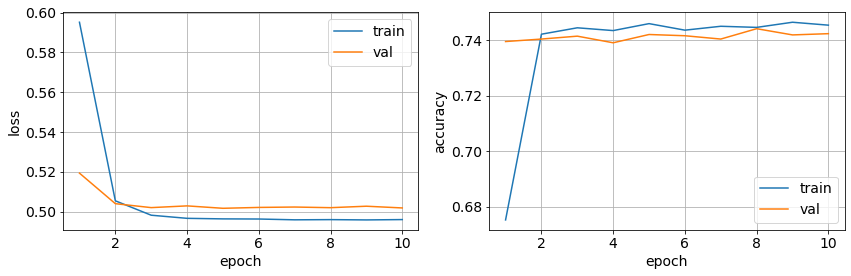

In [38]:
%%time
model, tokenizer = fit_sarcasm(num_words=100, embed_d=32, maxlen=8)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 16, 1)             1000      
                                                                 
 global_average_pooling1d_11  (None, 1)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 1,002
Trainable params: 1,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
625/625 [==============================] - 2s 2ms/step - loss: 0.6768 - accuracy: 0.5623 - val_loss: 0.6622 - val_accuracy: 0.5759
Epoch 2/20
625/625 [==============================] - 1s 2ms/step - loss: 0.6421 - accuracy: 0.6355 - val_l

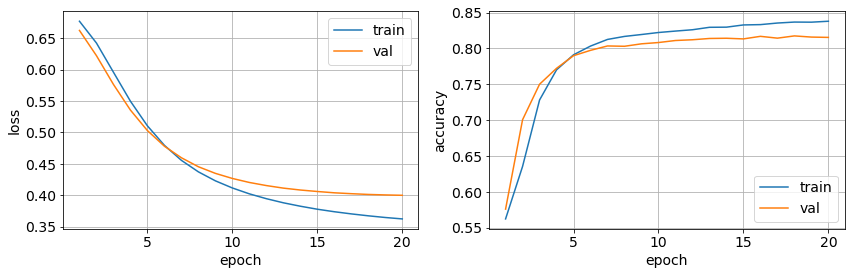

In [40]:
%%time
model, tokenizer = fit_sarcasm(num_words=1000, embed_d=1, maxlen=16, epochs=20)

In [67]:
def embed_extremes(model, tokenizer, d=0, n=20):
    wts = (model.layers[0].get_weights()[0][1:, d]
           * np.sign(model.layers[2].get_weights()[0][0, d]))
    idx = np.argsort(wts)
    for i in range(n):
        print(f'{wts[idx[i]]:-10.4f} {tokenizer.index_word[idx[i] + 1]:15}'
              f'{wts[idx[-1-i]]:-10.4f} {tokenizer.index_word[idx[-1-i] + 1]:15}')

In [66]:
embed_extremes(model, tokenizer)

   -3.3900 trump's            4.3899 area           
   -3.2249 donald             4.0226 nation         
   -3.1948 an                 3.5122 nation's       
   -3.0869 the                3.0937 local          
   -2.9245 is                 2.8513 fucking        
   -2.8903 here's             2.8058 introduces     
   -2.7687 your               2.5536 guy            
   -2.7196 and                2.5239 shit           
   -2.6155 accused            2.5191 report         
   -2.5899 protest            2.4342 only           
   -2.5593 these              2.4333 man            
   -2.4799 why                2.3822 few            
   -2.4650 huffpost           2.3418 fuck           
   -2.4492 a                  2.3064 study          
   -2.4046 2015               2.2706 enough         
   -2.3923 kardashian         2.2695 friends        
   -2.3194 i'm                2.2565 romney         
   -2.3142 california         2.1377 realizes       
   -2.3105 lessons            2.1000 god      

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 32, 1)             10000     
                                                                 
 global_average_pooling1d_13  (None, 1)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 10,002
Trainable params: 10,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
625/625 [==============================] - 2s 2ms/step - loss: 0.6809 - accuracy: 0.5579 - val_loss: 0.6722 - val_accuracy: 0.5633
Epoch 2/40
625/625 [==============================] - 1s 2ms/step - loss: 0.6611 - accuracy: 0.5660 - val

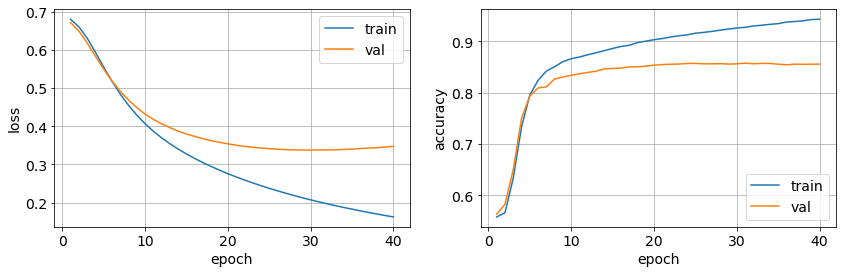

In [69]:
%%time
model, tokenizer = fit_sarcasm(num_words=10000, embed_d=1, maxlen=32, epochs=40)

In [71]:
embed_extremes(model, tokenizer)

   -4.3108 donald             5.8762 nation         
   -4.2143 here's             5.8683 area           
   -4.1817 trump's            5.3750 nation's       
   -4.1711 accused            4.7446 fucking        
   -4.1091 huffpost           4.4457 local          
   -4.0973 roundup            4.2955 shit           
   -4.0669 protest            3.9712 clearly        
   -3.9777 lessons            3.8296 few            
   -3.9636 i'm                3.7639 fuck           
   -3.9295 an                 3.7054 introduces     
   -3.6854 trans              3.6872 guy            
   -3.6826 2015               3.5728 archives       
   -3.6814 allegedly          3.5419 recommends     
   -3.6307 lgbtq              3.4740 assures        
   -3.6307 transgender        3.4278 realizes       
   -3.6246 lgbt               3.3947 unable         
   -3.6005 kardashian         3.3114 hoping         
   -3.5122 your               3.2954 slowly         
   -3.5027 queer              3.2406 romney   